# Masterarbeit (Batch-Tool)

In [149]:
# Tools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import time

# %matplotlib notebook
%matplotlib inline

In [2]:
! pip install demjson
import demjson

     |████████████████████████████████| 131 kB 2.9 MB/s eta 0:00:01
  Created wheel for demjson: filename=demjson-2.2.4-py3-none-any.whl size=73544 sha256=50460e26397c67fc378f936294aa0bdea438f8e9dd88d93964d02ed10ee0177b
  Stored in directory: /home/jovyan/.cache/pip/wheels/9c/c3/a5/ad09d152d6b4b24c3f3b6fe2793092ac03e2521e08240d28cf
Successfully built demjson


In [3]:
# Prevent hiding columns
pd.set_option('display.max_columns', None)

In [4]:
# Variablen
dir_var = "../"

In [5]:
# Dateien ausgeben
! ls -al ../

total 32
drwxr-xr-x 10 jovyan users   320 Dec 11 14:25 .
drwsrwsr-x  1 jovyan users  4096 Dec 11 14:27 ..
drwxr-xr-x 33 jovyan users  1056 Dec 11 14:25 DS-08-10-2020
drwxr-xr-x 18 jovyan users   576 Dec 11 14:25 DS-22-10-2020
drwxr-xr-x 13 jovyan users   416 Dec 11 14:26 .git
-rw-r--r--  1 jovyan users    43 Dec 11 14:25 .gitattributes
-rw-r--r--  1 jovyan users    30 Dec 11 14:25 .gitignore
-rw-r--r--  1 jovyan users 11357 Dec 11 14:25 LICENSE
drwxr-xr-x  5 jovyan users   160 Dec 11 14:27 notebooks
-rw-r--r--  1 jovyan users   102 Dec 11 14:25 README.md


## Process jobs

In [6]:
dfInputFiles = pd.read_excel(dir_var + "notebooks/inputFiles.xlsx", header=None, names=["inputName", "inputPath", "inputType", "inputId"])

### !!!!!!!!!!!!!!!! Quick Filter !!!!!!!!!!!!!!!!!!!!

In [7]:
# Take only samples
#dfInputFiles = dfInputFiles.head(2)
#dfInputFiles = dfInputFiles[dfInputFiles.inputName.str.contains("FREIHEIT")]

### Overview jobs

In [8]:
dfInputFiles

,inputName,inputPath,inputType,inputId
0,Xavier Naidoo (inoffiziell),DS-08-10-2020/ChatExport_2020-09-25-xavier,public_channel,9874390332
1,ATTILA HILDMANN OFFICIAL ⚫️⚪️🔴⚔️,DS-08-10-2020/ChatExport_2020-09-25-hildmann,public_channel,10034163583
2,Oliver Janich öffentlich,DS-08-10-2020/ChatExport_2020-09-25-janich,public_channel,9808932799
3,Gerechtigkeit für das Vaterland,DS-08-10-2020/ChatExport_2020-09-26-gerechtigk...,public_channel,10069007089
4,Corona Virus Informationen,DS-08-10-2020/ChatExport_2020-09-26-cvirusinfo,public_channel,9917074801
5,Liberté,DS-08-10-2020/ChatExport_2020-09-26-liberte,public_channel,10068807626
6,ॐ Golden Age Network ॐ,DS-08-10-2020/ChatExport_2020-09-26-goldenage,public_channel,9862302472
7,💙 Weltfrieden 2020 💙,DS-08-10-2020/ChatExport_2020-09-26-weltfriede...,public_channel,9850980068
8,🌍 Verschwörungen 🌍,DS-08-10-2020/ChatExport_2020-09-26-verschwoer...,public_channel,9942502804
9,[Q] Digital Research Army,DS-08-10-2020/ChatExport_2020-09-27-digitalRes...,public_channel,9846664545


### Transform jobs

In [9]:
def convertToDataFrameMeta(filePath):
    dF = pd.read_json(dir_var + filePath + "/result.json", encoding='utf-8')
    return dF

In [10]:
def convertToDataFrameMessages(filePath, dictMeta):
    dF = pd.json_normalize(dictMeta[filePath].messages)
    return dF

In [11]:
def checkIsFormattedText(text):
    textString = str(text)
    if(textString.startswith("[") == True and textString.endswith("]") == True):
        return True
    else:
        return False

In [12]:
#TODO: Format \n json and non json!

def convertToValidText(processedIsFormattedText, text):
    
    if(processedIsFormattedText != True):
        #Is no JSON
        return text;
    else:
        #Is json try to parse
        try:
            jsonList = demjson.decode(str(text), encoding='utf8')

            returnString = ""

            # Do for each item in list
            for lItem in jsonList:

                messageString = str(lItem)

                isFormatted = messageString.startswith("{") and messageString.endswith("}")

                if(isFormatted):
                    # Is Json Sub String
                    subJsonString = demjson.decode(str(messageString), encoding='utf8')
                    subJsonType = subJsonString["type"]

                    if(subJsonType == "bold"):
                        #text included
                        returnString = returnString + subJsonString["text"]
                        
                    elif(subJsonType == "italic"):
                        #text included
                        returnString = returnString + subJsonString["text"]
                        
                    elif(subJsonType == "underline"):
                        #text included
                        returnString = returnString + subJsonString["text"]
                    
                    elif(subJsonType == "email"):
                        #text included
                        returnString = returnString + subJsonString["text"]
                        
                    elif(subJsonType == "text_link"):
                        #text and href included
                        returnString = returnString + subJsonString["text"]
                        
                    elif(subJsonType == "link"):
                        #text included
                        returnString = returnString + subJsonString["text"]
                        
                    elif(subJsonType == "hashtag"):
                        #text included
                        returnString = returnString + subJsonString["text"]
                        
                    elif(subJsonType == "mention"):
                        #text included
                        returnString = returnString + subJsonString["text"]
                        
                    elif(subJsonType == "mention_name"):
                        #text and user_id included
                        returnString = returnString + subJsonString["text"]
                        
                    elif(subJsonType == "bot_command"):
                        #text included
                        returnString = returnString + subJsonString["text"]
                        
                    elif(subJsonType == "code"):
                        #text included
                        returnString = returnString + subJsonString["text"]
                        
                    elif(subJsonType == "phone"):
                        #text included
                        returnString = returnString + subJsonString["text"]
                        
                    elif(subJsonType == "strikethrough"):
                        #text included
                        returnString = returnString + subJsonString["text"]
                        
                    elif(subJsonType == "pre"):
                        #text and language included
                        returnString = returnString + subJsonString["text"]
                        
                    elif(subJsonType == "bank_card"):
                        #text included
                        returnString = returnString + subJsonString["text"]
                        
                    else:
                        print("- Error: Unknown type " + subJsonType)

                else:
                    # Is Normal Sub String
                    returnString = returnString + messageString

            return returnString
        
        except:
            #Parser error
            print("- Warn: Json parser error (set return text to inputText) >>" + text + "<<")
            return text

In [13]:
# Timer Start
timeStartGlobal = time.time()

# Add Key = filePath / Value = DataFrame (Metadata)
dictMeta = {}
for fP in dfInputFiles.inputPath:
    
    dictMeta[fP] = convertToDataFrameMeta(fP)

# Add Key = filePath / Value = DataFrame (Messages)
dictMessages = {}
for fP in dfInputFiles.inputPath:

    timeStartSingle = time.time()
    print("[Process now " + fP + "]")
    dfMessages = convertToDataFrameMessages(fP, dictMeta)
    
    dfMessages["processedChannelFilePath"]  = fP
    dfMessages["processedChannelType"]      = dictMeta[fP].type.iloc[0]
    dfMessages["processedRawTextSize"]      = dfMessages["text"].str.len()
    dfMessages["processedIsFormattedText"]  = dfMessages["text"].apply(checkIsFormattedText)
    dfMessages["processedValidText"]        = dfMessages.apply(lambda x: convertToValidText(x.processedIsFormattedText, x.text), axis=1)
    dfMessages["processedValidTextSize"]    = dfMessages["processedValidText"].str.len()
    
    dictMessages[fP] = dfMessages
    timeEndSingle = time.time()
    print('{:5.3f}s'.format(timeEndSingle-timeStartSingle))

# All Messages to DataFrame
dfAllDataMessages = pd.DataFrame()
for fP in dfInputFiles.inputPath:
    
    print("[Append now " + fP + "]")
    dfMessages        = dictMessages[fP].copy()
    dfAllDataMessages = dfAllDataMessages.append(dfMessages)

# Print Time
timeEndGlobal = time.time()
print()
print("Finished global")
print('{:5.3f}s'.format(timeEndGlobal-timeStartGlobal))

[Process now DS-08-10-2020/ChatExport_2020-09-25-xavier]
14.823s
[Process now DS-08-10-2020/ChatExport_2020-09-25-hildmann]
25.554s
[Process now DS-08-10-2020/ChatExport_2020-09-25-janich]
75.024s
[Process now DS-08-10-2020/ChatExport_2020-09-26-gerechtigkeitVaterland]
1.373s
[Process now DS-08-10-2020/ChatExport_2020-09-26-cvirusinfo]
12.019s
[Process now DS-08-10-2020/ChatExport_2020-09-26-liberte]
4.514s
[Process now DS-08-10-2020/ChatExport_2020-09-26-goldenage]
5.601s
[Process now DS-08-10-2020/ChatExport_2020-09-26-weltfrieden2020]
4.324s
[Process now DS-08-10-2020/ChatExport_2020-09-26-verschwoerungen]
11.558s
[Process now DS-08-10-2020/ChatExport_2020-09-27-digitalResearch]
- Error: Unknown type cashtag
48.887s
[Process now DS-08-10-2020/ChatExport_2020-09-27-stefanraven]
2.054s
[Process now DS-08-10-2020/ChatExport_2020-09-27-evaherman]
49.335s
[Process now DS-08-10-2020/ChatExport_2020-09-28-freiheitsChat]
- Warn: Json parser error (set return text to inputText) >>[Nachweis h

### Type of channels

In [14]:
dfInputFiles.inputType.value_counts()

public_channel        38
public_supergroup      8
private_supergroup     1
Name: inputType, dtype: int64

### Only in different types of channels

In [15]:
dfAllDataMessages.columns.difference(
    dfAllDataMessages[dfAllDataMessages.processedChannelType == "public_channel"].dropna(how='all', axis=1).columns
)

Index(['address', 'contact_information.first_name',
       'contact_information.last_name', 'contact_information.phone_number',
       'contact_vcard', 'game_description', 'game_link', 'game_message_id',
       'game_title', 'inviter', 'members', 'place_name', 'saved_from',
       'score'],
      dtype='object')

In [16]:
dfAllDataMessages.columns.difference(
    dfAllDataMessages[dfAllDataMessages.processedChannelType == "public_supergroup"].dropna(how='all', axis=1).columns
)

Index(['author', 'live_location_period_seconds'], dtype='object')

In [17]:
# Vorsicht: Wenige Daten
dfAllDataMessages.columns.difference(
    dfAllDataMessages[dfAllDataMessages.processedChannelType == "private_supergroup"].dropna(how='all', axis=1).columns
)

Index(['address', 'author', 'contact_information.first_name',
       'contact_information.last_name', 'contact_information.phone_number',
       'contact_vcard', 'game_description', 'game_link', 'game_message_id',
       'game_title', 'inviter', 'live_location_period_seconds',
       'location_information.latitude', 'location_information.longitude',
       'place_name', 'score'],
      dtype='object')

## Queries

In [18]:
def queryChannelId(filePath):
    dfMeta = dictMeta[filePath].copy()
    return str(dfMeta["id"].iloc[0])

In [19]:
def queryChannelName(filePath):
    dfMeta = dictMeta[filePath].copy()
    inputStr  = str(dfMeta["name"].iloc[0])
    outputStr = inputStr.encode('ascii', 'ignore')
    outputStr = outputStr.decode('ascii')
    return outputStr[:25]

In [20]:
def queryChannelType(filePath):
    dfMeta = dictMeta[filePath].copy()
    return str(dfMeta["type"].iloc[0])

In [21]:
def queryChannelCountEntries(filePath):
    dfMessages = dictMessages[filePath].copy()
    return len(dfMessages.index)

In [22]:
def queryChannelCountRawText(filePath):
    dfMessages = dictMessages[filePath].copy()
    dfMessages = dfMessages[dfMessages.processedRawTextSize > 0]
    return len(dfMessages.index)

In [23]:
def queryChannelCountIsFormattedText(filePath):
    dfMessages = dictMessages[filePath].copy()
    dfMessages = dfMessages[dfMessages.processedIsFormattedText == True]
    return len(dfMessages.index)

In [24]:
def queryChannelCountValidText(filePath):
    dfMessages = dictMessages[filePath].copy()
    dfMessages = dfMessages[dfMessages.processedValidTextSize > 0]
    return len(dfMessages.index)

In [25]:
# TODO mit process
def queryChannelCountPhoto(filePath):
    dfMessages = dictMessages[filePath].copy()
    if "photo" not in dfMessages.columns:
        return 0
    else:
        dfMessages = dfMessages.photo.dropna()
        return len(dfMessages.index)

In [153]:
# TODO mit process
def queryChannelCountFile(filePath):
    dfMessages = dictMessages[filePath].copy()
    if "file" not in dfMessages.columns:
        return 0
    else:
        dfMessages = dfMessages.file.dropna()
        return len(dfMessages.index)

In [154]:
# TODO mit process
def queryChannelCountEdited(filePath):
    dfMessages = dictMessages[filePath].copy()
    if "edited" not in dfMessages.columns:
        return 0
    else:
        dfMessages = dfMessages.edited.dropna()
        return len(dfMessages.index)

In [155]:
def queryCalcPercent(countFiltered, countTotal):
    return (countFiltered / countTotal) * 100

In [156]:
dfQueryMeta = pd.DataFrame(dfInputFiles.inputPath)

dfQueryMeta["queryChannelId"]                     = dfQueryMeta.inputPath.apply(queryChannelId)
dfQueryMeta["queryChannelName"]                   = dfQueryMeta.inputPath.apply(queryChannelName)
dfQueryMeta["queryChannelType"]                   = dfQueryMeta.inputPath.apply(queryChannelType)
dfQueryMeta["queryChannelCountEntries"]           = dfQueryMeta.inputPath.apply(queryChannelCountEntries)

dfQueryMeta["queryChannelCountRawText"]           = dfQueryMeta.inputPath.apply(queryChannelCountRawText)
dfQueryMeta["queryChannelCountIsFormattedText"]   = dfQueryMeta.inputPath.apply(queryChannelCountIsFormattedText)
dfQueryMeta["queryChannelCountValidText"]         = dfQueryMeta.inputPath.apply(queryChannelCountValidText)
dfQueryMeta["queryChannelCountPhoto"]             = dfQueryMeta.inputPath.apply(queryChannelCountPhoto)
dfQueryMeta["queryChannelCountFile"]              = dfQueryMeta.inputPath.apply(queryChannelCountFile)
dfQueryMeta["queryChannelCountEdited"]            = dfQueryMeta.inputPath.apply(queryChannelCountEdited)

dfQueryMeta["queryChannelPercentRawText"]         = queryCalcPercent(dfQueryMeta["queryChannelCountRawText"], dfQueryMeta["queryChannelCountEntries"])
dfQueryMeta["queryChannelPercentIsFormattedText"] = queryCalcPercent(dfQueryMeta["queryChannelCountIsFormattedText"], dfQueryMeta["queryChannelCountEntries"])
dfQueryMeta["queryChannelPercentValidText"]       = queryCalcPercent(dfQueryMeta["queryChannelCountValidText"], dfQueryMeta["queryChannelCountEntries"])
dfQueryMeta["queryChannelPercentPhoto"]           = queryCalcPercent(dfQueryMeta["queryChannelCountPhoto"], dfQueryMeta["queryChannelCountEntries"])
dfQueryMeta["queryChannelPercentFile"]            = queryCalcPercent(dfQueryMeta["queryChannelCountFile"], dfQueryMeta["queryChannelCountEntries"])
dfQueryMeta["queryChannelPercentEdited"]          = queryCalcPercent(dfQueryMeta["queryChannelCountEdited"], dfQueryMeta["queryChannelCountEntries"])

dfQueryMeta.sort_values(by="queryChannelCountEntries", ascending=False)

,inputPath,queryChannelId,queryChannelName,queryChannelType,queryChannelCountEntries,queryChannelCountRawText,queryChannelCountIsFormattedText,queryChannelCountValidText,queryChannelCountPhoto,queryChannelCountFile,queryChannelCountEdited,queryChannelPercentRawText,queryChannelPercentIsFormattedText,queryChannelPercentValidText,queryChannelPercentPhoto,queryChannelPercentFile,queryChannelPercentEdited
12,DS-08-10-2020/ChatExport_2020-09-28-freiheitsChat,9717909816,FREIHEITS-CHAT,public_supergroup,271554,186029,64510,186029,26200,16112,4126,68.505343,23.755864,68.505343,9.648173,5.933258,1.519403
28,DS-08-10-2020/ChatExport_2020-10-02-chatDieWah...,9969119455,DieWahrheitundnurdieWahrh,public_supergroup,113825,104243,23103,104243,8240,5722,3239,91.581814,20.296947,91.581814,7.239183,5.027015,2.845596
38,DS-22-10-2020/ChatExport_2020-10-13-wirSindMehr,9788772075,WIR sind VIEL mehr!,public_supergroup,79384,69769,8539,69769,5456,7864,1338,87.887988,10.756576,87.887988,6.872921,9.906278,1.685478
2,DS-08-10-2020/ChatExport_2020-09-25-janich,9808932799,Oliver Janich ffentlich,public_channel,35040,29852,24511,29852,5604,4579,3542,85.194064,69.951484,85.194064,15.993151,13.067922,10.108447
26,DS-08-10-2020/ChatExport_2020-10-01-freiheitsC...,9943834900,FREIHEITSCHAT - BLITZ,public_supergroup,31392,26034,10625,26034,6327,3835,540,82.931957,33.846203,82.931957,20.154817,12.216488,1.720183
30,DS-08-10-2020/ChatExport_2020-10-04-unzensiert,9725746662,Unzensiert,public_channel,30814,30167,29912,30167,18671,11303,26697,97.900305,97.072759,97.900305,60.592588,36.681379,86.639190
11,DS-08-10-2020/ChatExport_2020-09-27-evaherman,9915108907,Eva Herman Offiziell,public_channel,26724,25181,20197,25181,3068,1354,1768,94.226164,75.576261,94.226164,11.480317,5.066607,6.615776
15,DS-08-10-2020/ChatExport_2020-09-29-strahlenkranz,10050449614,Strahlenkranz V....Merci,public_channel,25684,20099,18589,20099,10969,2620,1238,78.254945,72.375798,78.254945,42.707522,10.200903,4.820121
37,DS-22-10-2020/ChatExport_2020-10-13-xavierChat,9907103286,Regellese und Diskussions,private_supergroup,24401,23117,3287,23117,1355,1055,737,94.737921,13.470759,94.737921,5.553051,4.323593,3.020368
1,DS-08-10-2020/ChatExport_2020-09-25-hildmann,10034163583,ATTILA HILDMANN OFFICIAL,public_channel,22204,16285,10026,16285,7840,1935,3183,73.342641,45.154026,73.342641,35.308953,8.714646,14.335255


### Plotter

In [157]:
def queryPlotter(attributeName):
    dfFilter = dfQueryMeta.copy()
    sns.catplot(
        y="queryChannelName",
        x=attributeName,
        data=dfFilter,
        hue="queryChannelType",
        #aspect=1.2,
        #palette="rocket",
        kind="bar",
        height=7,
        order=dfFilter.sort_values(attributeName, ascending=False).queryChannelName
    )

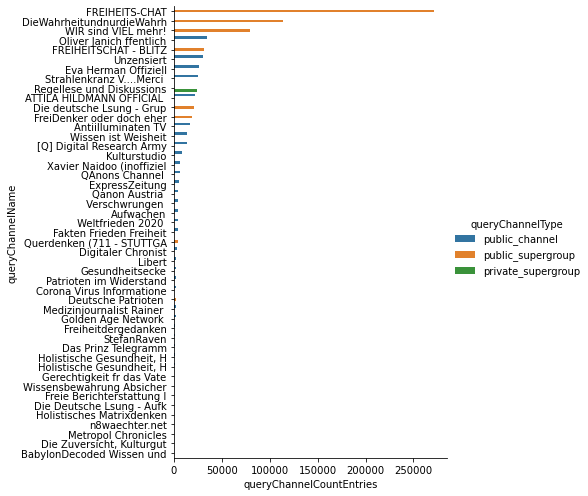

In [158]:
queryPlotter("queryChannelCountEntries")

In [159]:
#queryPlotter("queryChannelPercentRawText")

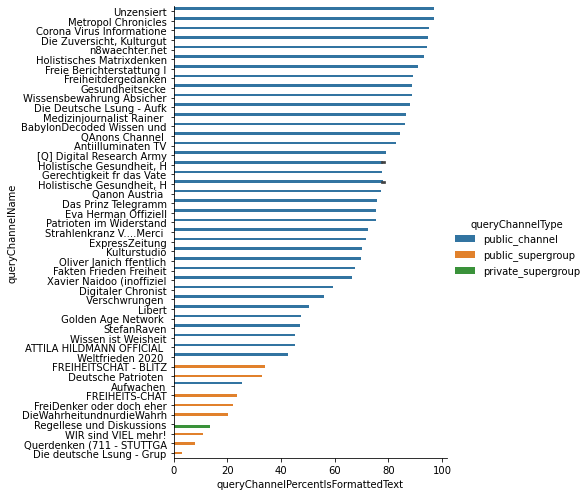

In [160]:
queryPlotter("queryChannelPercentIsFormattedText")

In [161]:
#queryPlotter("queryChannelPercentValidText") 

In [162]:
#queryPlotter("queryChannelPercentPhoto")

In [163]:
#queryPlotter("queryChannelPercentFile")

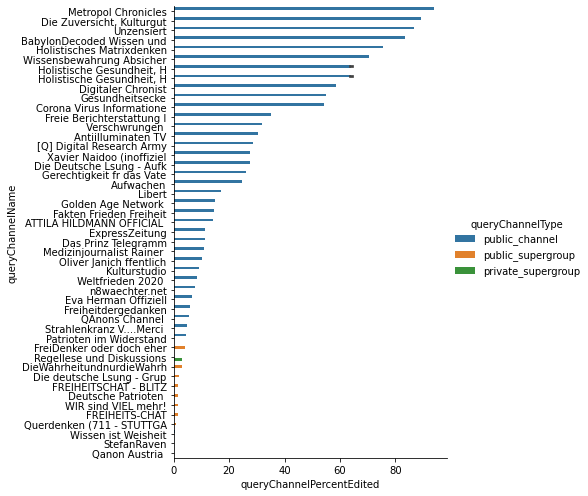

In [164]:
queryPlotter("queryChannelPercentEdited")

## Samples for different types (on copy)

In [165]:
#dfTestPublicSupergroup = dictMessages["DS-08-10-2020/ChatExport_2020-09-28-freiheitsChat"].copy()
#dfTestPublicChannel    = dictMessages["DS-08-10-2020/ChatExport_2020-09-25-janich"].copy()

### Do on all messages (normalize)

In [166]:
def normalizedValidTextSize(df):
    df = df.copy()
    # https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
    # keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
    return df[np.abs(df.processedValidTextSize-df.processedValidTextSize.mean()) <= (3*df.processedValidTextSize.std())]

In [167]:
dfMessages = dfAllDataMessages.copy()
print("Before all filters\t\t" + str(len(dfMessages.index)))

dfMessages = dfMessages[dfMessages.processedValidTextSize > 10]
print("Before normalizedValidTextSize\t" + str(len(dfMessages.index)))

dfMessages = normalizedValidTextSize(dfMessages)
print("After normalizedValidTextSize\t" + str(len(dfMessages.index)))

Before all filters		831260
Before normalizedValidTextSize	620319
After normalizedValidTextSize	608416


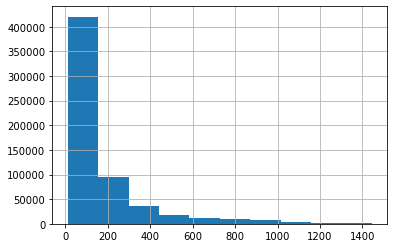

In [168]:
_ = dfMessages.processedValidTextSize.hist()

In [169]:
sampleString = dfMessages.sort_values(by="processedValidTextSize", ascending=False).processedValidText.iloc[2]
print(">>" + sampleString + "<<")

>>Was geht hier vor ?
Heute Morgen war es wiedermal soweit... Ich habe die Augen noch nicht geöffnet, da ertönt aus der Entfernung bereits das Signalhorn einer Fahrzeugsirene. Bis jetzt, 11:30 Uhr morgens, habe ich weitere 4 weitere Sirenen in Abständen von etwa einer Stunde wahrgenommen.
Ich weiß ja nicht, ob ich der einzige bin, dem es auffällt. Ich muss jedoch feststellen, dass sich das Geräusch von entfernten Sirenen, zumindest bei mir in der Ecke, in den letzten Jahren extrem vermehrt hat. Als Einwohner eines, naja, fortschrittlichen Dorfes am Stadtrand einer Kleinstadt im Westen Deutschlands, erinnere ich mich in meiner Schulzeit NICHT daran fast täglich Sirenen in naher Umgebung zu vernehmen.

Es war maximal 1x in der Woche, dass man deutlich den Schall eines Polizei-, Feuerwehr-, oder Rettungsfahrzeug in der Nähe wahrnahm. Heute stelle ich immer deutlicher und häufiger fest, dass ich fast täglich mehrere Sirenen höre. Oft bereits zwischen 6:00 Uhr und 8:00 Uhr, wenn ich die Aug